Dear Participant,

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

Use the provided dataset in order to do your analysis.

#Attribute Information:

#Matrix column entries (attributes):
#name - ASCII subject name and recording number
#MDVP:Fo(Hz) - Average vocal fundamental frequency
#MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
#MDVP:Flo(Hz) - Minimum vocal fundamental frequency
#MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
#measures of variation in fundamental frequency
#MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
#NHR,HNR - Two measures of ratio of noise to tonal components in the voice
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy
#RPDE,D2 - Two nonlinear dynamical complexity measures
#DFA - Signal fractal scaling exponent
#spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None  
pd.options.display.float_format = '{:.6f}'.format
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
import random

### Q1. Load the dataset 

In [41]:
df = pd.read_csv('parkinsons.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [53]:
df.shape

(195, 24)

### Q2. Use the .describe() method on the dataset and state any insights you may come across.

In [43]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### Q3. Check for class imbalance. Do people with Parkinson's have greater representation in the dataset?

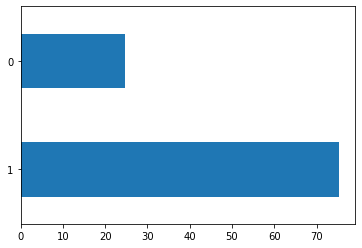

In [44]:
(df['status'].value_counts(normalize=True)*100).plot(kind='barh')
plt.xticks(rotation='horizontal')
plt.show()
# Yes Parkinson's have greater representation in the dataset

### Q4. Check for missing vaues and take necessary measures by dropping observation or imputing them.

In [45]:
df.isnull().sum()
# No null values 

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

### Q5. Plot the distribution of all the features. State any observations you can make based on the distribution plots.

In [46]:
# sns.pairplot(df,hue='status')
# plt.show()

### Q6. Check for outliers in the data. Are there any variables with high amount of outliers.

In [47]:
num_df = df.select_dtypes(include=np.number)
cat_df = df.select_dtypes(exclude=np.number)

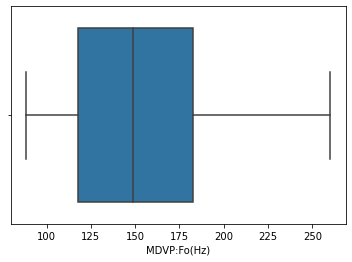

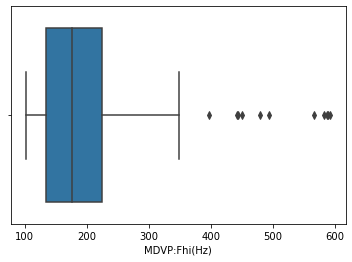

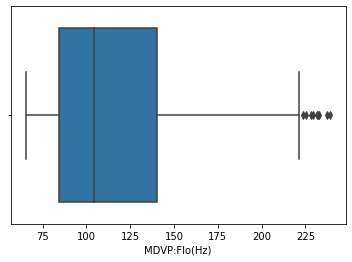

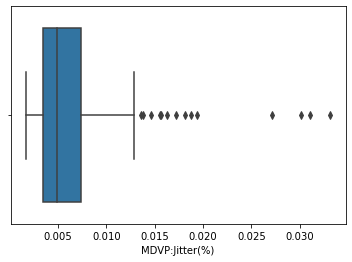

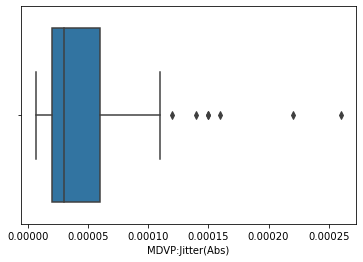

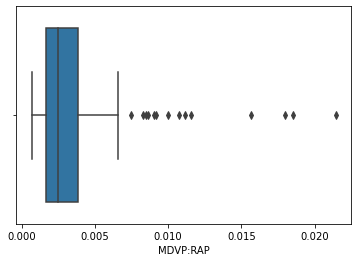

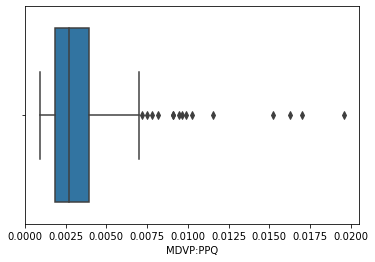

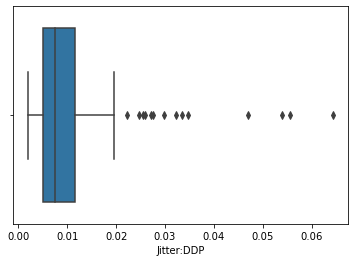

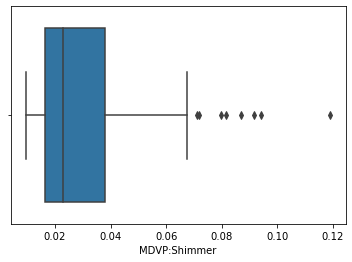

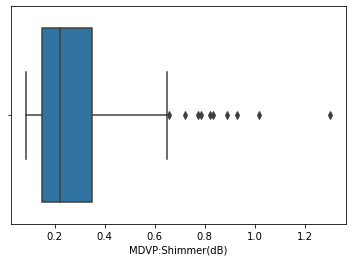

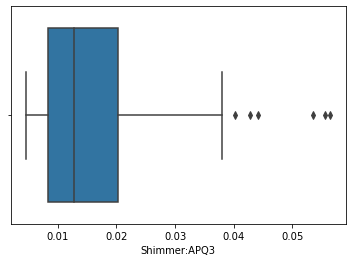

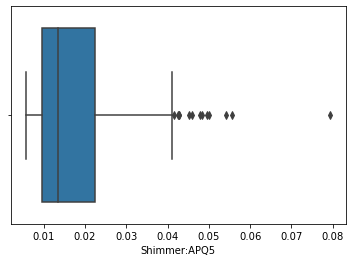

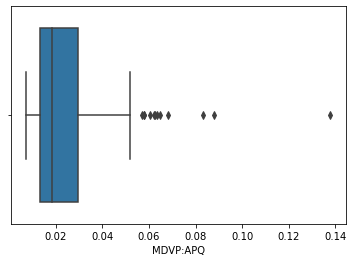

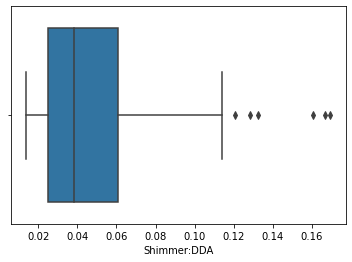

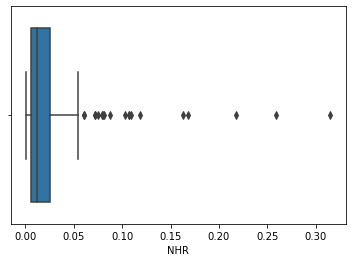

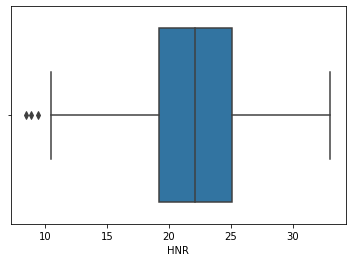

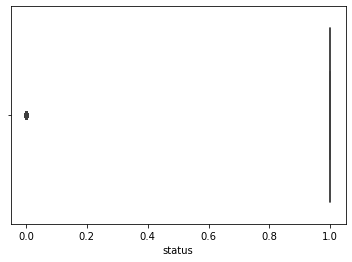

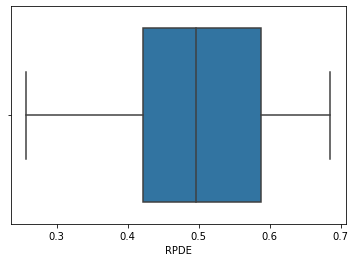

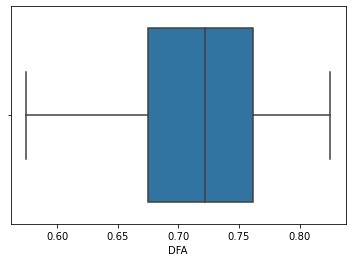

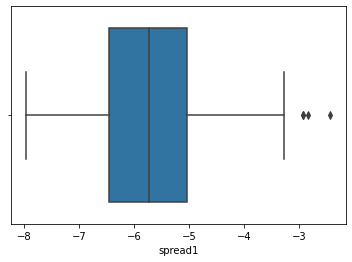

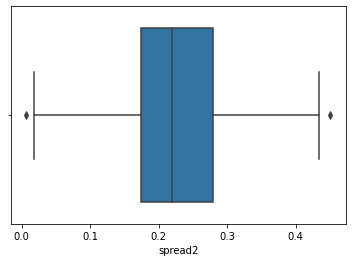

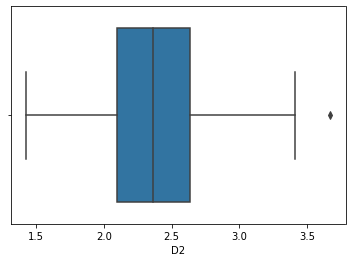

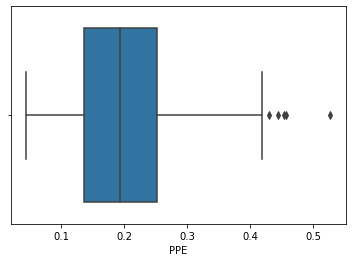

In [48]:
for i in num_df.columns:
    sns.boxplot(df[i])
    plt.show()

In [49]:
def cap(s):
    q1= df[s].quantile(0.25)
    q3= df[s].quantile(0.75)
    iqr= q3 -q1
    ub= q3 + 1.5 * iqr 
    lb= q1 - 1.5 * iqr
    uc = df[s].quantile(0.99)
    lc = df[s].quantile(0.01)
    ind1=df[df[s] > ub].index
    ind2=df[df[s] < lb].index
    df.loc[ind1,s]=uc
    df.loc[ind2,s]=lc

In [50]:
cap('MDVP:Flo(Hz)')
cap('MDVP:Jitter(%)')
cap('MDVP:Jitter(Abs)')
cap('MDVP:RAP')
cap('MDVP:PPQ')
cap('Jitter:DDP')
cap('MDVP:Shimmer')
cap('MDVP:Shimmer(dB)')
cap('Shimmer:APQ3')
cap('Shimmer:APQ5')
cap('MDVP:APQ')
cap('Shimmer:DDA')
cap('NHR')
cap('HNR')
cap('spread1')
cap('spread2')
cap('D2')
cap('PPE')

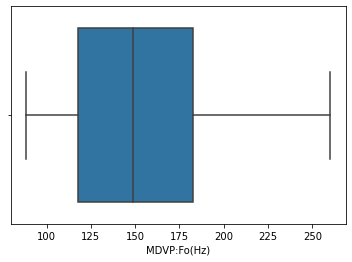

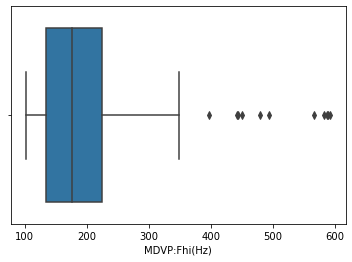

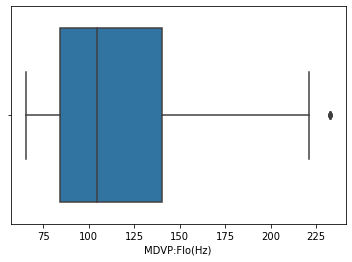

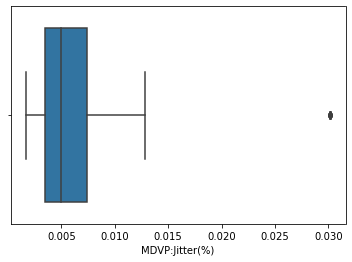

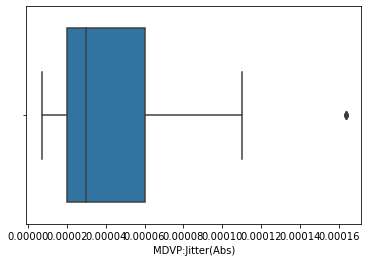

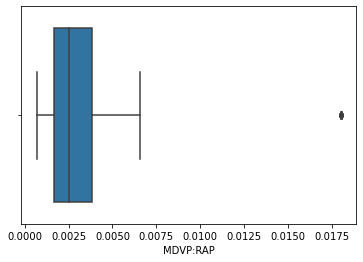

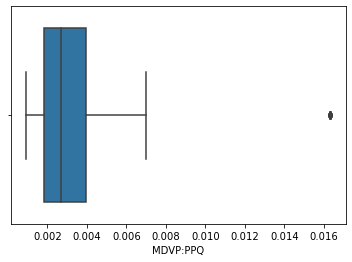

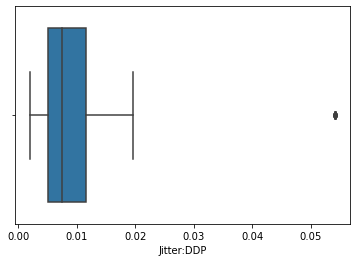

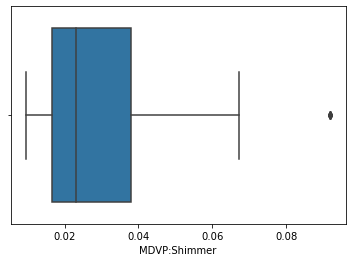

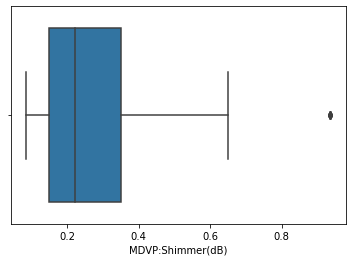

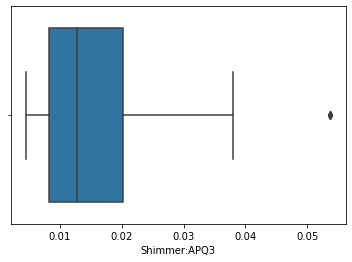

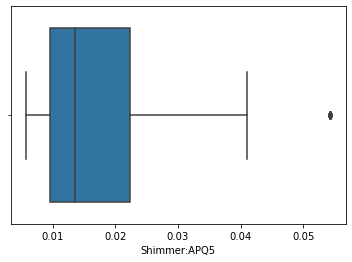

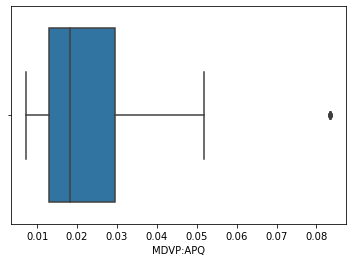

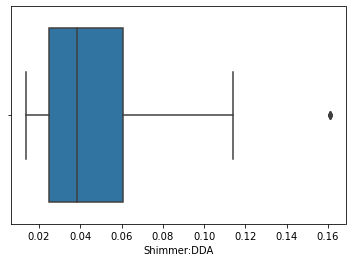

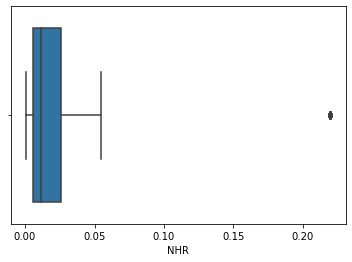

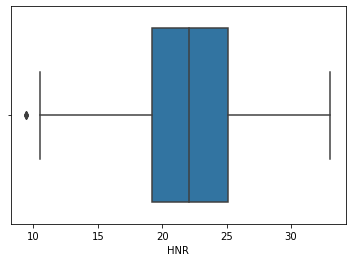

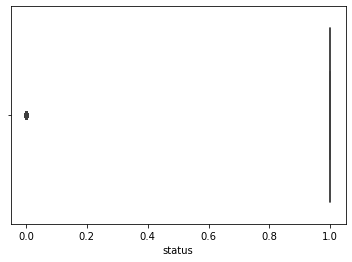

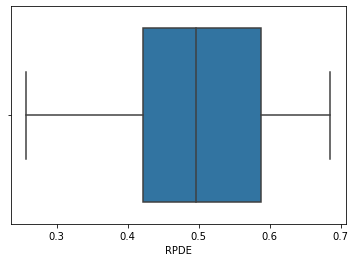

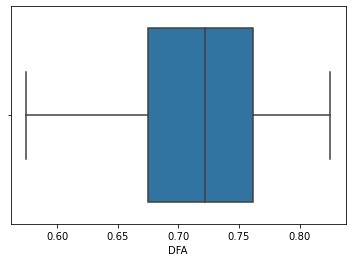

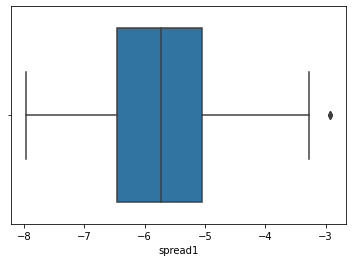

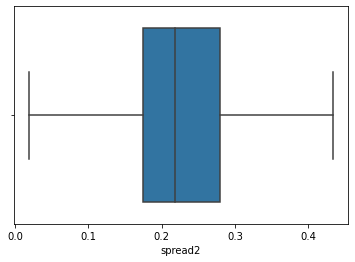

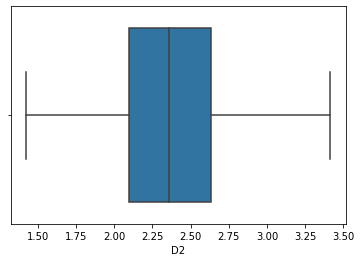

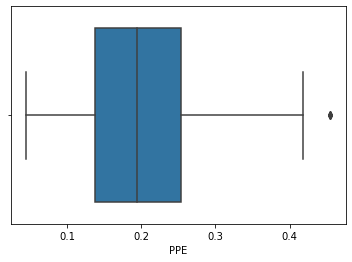

In [51]:
for i in num_df.columns:
    sns.boxplot(df[i])
    plt.show()

In [52]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_final = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_final.shape

(114, 24)

### Q7. Are there any strong correlations among the independent features?

In [58]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [64]:
x = df_final.drop(columns=['status','name'])
y = df_final ['status']

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[ vif(x.values,i) for i in range(x.shape[1]) ]
pd.DataFrame(vf,index=x.columns,columns=['vif'])

,vif
MDVP:Fo(Hz),182.536114
MDVP:Fhi(Hz),59.432680
MDVP:Flo(Hz),22.296323
MDVP:Jitter(%),799.055080
MDVP:Jitter(Abs),133.771028
MDVP:RAP,1465537.641348
MDVP:PPQ,472.992190
Jitter:DDP,1465095.505039
MDVP:Shimmer,3283.133922
MDVP:Shimmer(dB),407.723742


In [67]:
x = df_final.drop(columns=['status','name','Shimmer:DDA'])
y = df_final ['status']
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[ vif(x.values,i) for i in range(x.shape[1]) ]
pd.DataFrame(vf,index=x.columns,columns=['vif'])

,vif
MDVP:Fo(Hz),182.265789
MDVP:Fhi(Hz),59.274275
MDVP:Flo(Hz),22.029787
MDVP:Jitter(%),792.653770
MDVP:Jitter(Abs),133.709800
MDVP:RAP,1458571.002411
MDVP:PPQ,472.674749
Jitter:DDP,1457724.037706
MDVP:Shimmer,3096.647563
MDVP:Shimmer(dB),391.975396


In [68]:
x = df_final.drop(columns=['status','name','Shimmer:DDA','MDVP:RAP'])
y = df_final ['status']
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[ vif(x.values,i) for i in range(x.shape[1]) ]
pd.DataFrame(vf,index=x.columns,columns=['vif'])

,vif
MDVP:Fo(Hz),182.210328
MDVP:Fhi(Hz),59.257212
MDVP:Flo(Hz),21.701744
MDVP:Jitter(%),791.694582
MDVP:Jitter(Abs),133.674967
MDVP:PPQ,464.385341
Jitter:DDP,221.412275
MDVP:Shimmer,3029.294708
MDVP:Shimmer(dB),391.526866
Shimmer:APQ3,808.254631


In [69]:
x = df_final.drop(columns=['status','name','Shimmer:DDA','MDVP:RAP','MDVP:Shimmer'])
y = df_final ['status']
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[ vif(x.values,i) for i in range(x.shape[1]) ]
pd.DataFrame(vf,index=x.columns,columns=['vif'])

,vif
MDVP:Fo(Hz),180.741545
MDVP:Fhi(Hz),57.089687
MDVP:Flo(Hz),21.438615
MDVP:Jitter(%),791.258570
MDVP:Jitter(Abs),133.570798
MDVP:PPQ,464.385038
Jitter:DDP,220.883381
MDVP:Shimmer(dB),318.943369
Shimmer:APQ3,189.455624
Shimmer:APQ5,253.086485


In [71]:
x = df_final.drop(columns=['status','name','Shimmer:DDA','MDVP:RAP','MDVP:Shimmer','MDVP:Jitter(%)'])
y = df_final ['status']
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[ vif(x.values,i) for i in range(x.shape[1]) ]
pd.DataFrame(vf,index=x.columns,columns=['vif'])

,vif
MDVP:Fo(Hz),170.275824
MDVP:Fhi(Hz),56.413789
MDVP:Flo(Hz),20.509372
MDVP:Jitter(Abs),122.496945
MDVP:PPQ,262.868997
Jitter:DDP,136.215380
MDVP:Shimmer(dB),317.752970
Shimmer:APQ3,166.677294
Shimmer:APQ5,194.603171
MDVP:APQ,110.348280


In [72]:
# 'Shimmer:DDA','MDVP:RAP','MDVP:Shimmer','MDVP:Jitter(%)' show very strong coorelation

### Q8. Split dataset into training & test dataset  

In [83]:
x = df_final.drop(columns=['status','name','Shimmer:DDA','MDVP:RAP','MDVP:Shimmer','MDVP:Jitter(%)'])
y = df_final ['status']

In [84]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,random_state=10)

### Q9. Create a default decision tree model using criterion = Entropy 

In [85]:
dct = DecisionTreeClassifier(criterion='entropy')
dt = dct.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
accuracy_score(ytest,ypred)

1.0

### Q10.  Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? 

In [91]:
tuned_paramaters = [{'max_depth': [2, 3, 4, 5, 6]}]

In [92]:
gb_grid = GridSearchCV(estimator = dt, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
gb_grid.fit(xtrain,ytrain)

# get the best parameters
print('Best parameters for Gradient Boositng Classifier: ', gb_grid.best_params_, '\n')

Best parameters for Gradient Boositng Classifier:  {'max_depth': 2} 



In [95]:
dct = DecisionTreeClassifier(criterion='entropy',max_depth= 2)
dt = dct.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
accuracy_score(ytest,ypred)

1.0

### Q11. Implement a Random Forest model. What is the optimal number of trees that gives the best result?

In [117]:
rfc =RandomForestClassifier(random_state=10)
rf = rfc.fit(xtrain,ytrain)
ypred = rf.predict(xtest)
accuracy_score(ytest,ypred)

1.0

In [112]:
tuned_paramaters = [{'n_estimators': [1,10,20, 30, 40, 50, 60]}]

In [113]:
gb_grid = GridSearchCV(estimator = rf, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
gb_grid.fit(xtrain,ytrain)

# get the best parameters
print('Best parameters for Gradient Boositng Classifier: ', gb_grid.best_params_, '\n')

Best parameters for Gradient Boositng Classifier:  {'n_estimators': 1} 



In [118]:
rfc =RandomForestClassifier(random_state=10,n_estimators=1)
rf = rfc.fit(xtrain,ytrain)
ypred = rf.predict(xtest)
accuracy_score(ytest,ypred)

1.0